https://www.geeksforgeeks.org/how-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum/


In [2]:
from typing import Any

import matplotlib.pyplot as plt
import numpy as np

In [3]:
def sum_squared_error(y_true: float, y_predicted: float) -> Any:
    # Calculating the loss or cost
    cost = np.sum((y_true - y_predicted) ** 2)
    return cost


# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_descent(
    x: np.ndarray[Any, Any],
    y: np.ndarray[Any, Any],
    iterations: int = 1000,
    learning_rate: float = 0.0001,
    stopping_threshold: float = 1e-6,
) -> tuple[float, float]:
    # Initializing weight, bias, learning rate and iterations
    current_weight = 0.1
    # current_bias = 0.01
    # slope = wieght
    # y_intercept = bias
    current_bias = 15
    iterations = iterations
    learning_rate = learning_rate
    # n = float(len(x))

    costs = []
    weights = []
    previous_cost = None

    # Estimation of optimal parameters
    for i in range(iterations):
        # Making predictions
        y_predicted = (current_weight * x) + current_bias

        # Calculationg the current cost
        current_cost = sum_squared_error(y, y_predicted)

        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost - current_cost) <= stopping_threshold:
            break

        previous_cost = current_cost

        costs.append(current_cost)
        weights.append(current_weight)

        # Calculating the gradients
        weight_derivative = (-2) * sum(x * (y - y_predicted))
        bias_derivative = (-2) * sum(y - y_predicted)

        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)

        # Printing the parameters for each 1000th iteration
        print(
            f'Iteration {i + 1}: Cost {current_cost}, Weight \
        {current_weight}, Bias {current_bias}'
        )

    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize=(8, 6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title('Cost vs Weights')
    plt.ylabel('Cost')
    plt.xlabel('Weight')
    plt.show()

    return current_weight, current_bias

In [4]:
def main() -> None:
    # Data
    x = np.array([
        32.50234527,
        53.42680403,
        61.53035803,
        47.47563963,
        59.81320787,
        55.14218841,
        52.21179669,
        39.29956669,
        48.10504169,
        52.55001444,
        45.41973014,
        54.35163488,
        44.1640495,
        58.16847072,
        56.72720806,
        48.95588857,
        44.68719623,
        60.29732685,
        45.61864377,
        38.81681754,
    ])

    y = np.array([
        31.70700585,
        68.77759598,
        62.5623823,
        71.54663223,
        87.23092513,
        78.21151827,
        79.64197305,
        59.17148932,
        75.3312423,
        71.30087989,
        55.16567715,
        82.47884676,
        62.00892325,
        75.39287043,
        81.43619216,
        60.72360244,
        82.89250373,
        97.37989686,
        48.84715332,
        56.87721319,
    ])

    # Estimating weight and bias using gradient descent
    estimated_weight, eatimated_bias = gradient_descent(x, y, iterations=10)
    print(f'Estimated Weight: {estimated_weight}\nEstimated Bias: {eatimated_bias}')

    # Making predictions using estimated parameters
    y_pred = estimated_weight * x + eatimated_bias

    # Plotting the regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, marker='o', color='red')
    plt.plot(
        [min(x), max(x)],
        [min(y_pred), max(y_pred)],  # type: ignore
        color='blue',
        markerfacecolor='red',
        markersize=10,
        linestyle='dashed',
    )

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

Iteration 1: Cost 52904.807866832365, Weight         10.290789025952254, Bias 15.1977516261418
Iteration 2: Cost 4325013.67339287, Weight         -83.71069155400762, Bias 13.358054669422025
Iteration 3: Cost 367820396.3769552, Weight         783.3772354842846, Bias 30.312174263946716
Iteration 4: Cost 31296080116.007164, Weight         -7214.807212861626, Bias -126.09146037379072
Iteration 5: Cost 2662848762052.445, Weight         66561.97502398578, Bias 1316.5899628871853
Iteration 6: Cost 226570355378288.84, Weight         -613969.1639413296, Bias -11990.994797086343
Iteration 7: Cost 1.927789768134607e+16, Weight         5663380.122513668, Bias 110760.69472920627
Iteration 8: Cost 1.6402734523468974e+18, Weight         -52240089.39682033, Bias -1021524.3648528344
Iteration 9: Cost 1.3956381774334815e+20, Weight         481872579.7246133, Bias 9422889.406843547
Iteration 10: Cost 1.1874885370624864e+22, Weight         -4444884757.68481, Bias -86918379.33260727


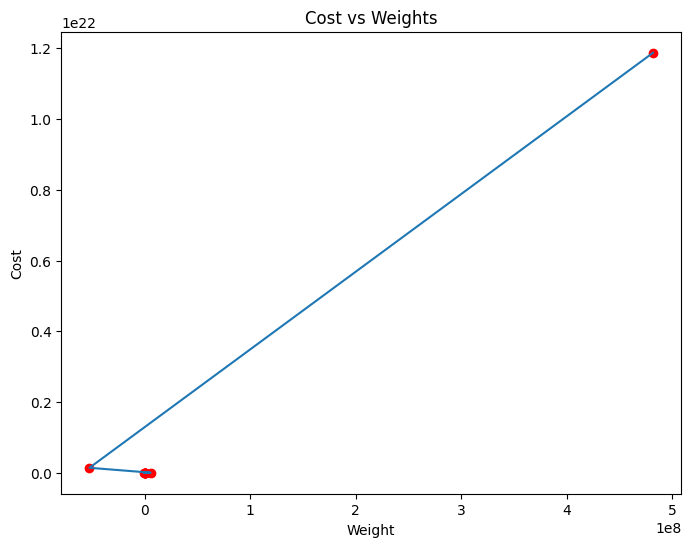

Estimated Weight: -4444884757.68481
Estimated Bias: -86918379.33260727


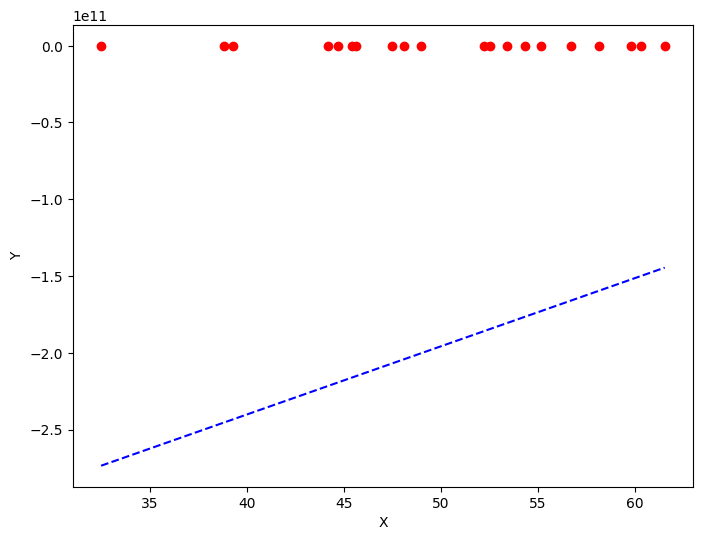

In [5]:
main()